# Visualizations

In this tutorial, we introduce the basic visualizations of proxies with `cfr`.

In [1]:
%load_ext autoreload
%autoreload 2

import cfr
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## Load the PAGES2k network stored in a pandas `DataFrame`

In [2]:
df = pd.read_pickle('./data/pages2k_dataset.pkl')
df.columns

Index(['paleoData_pages2kID', 'dataSetName', 'archiveType', 'geo_meanElev',
       'geo_meanLat', 'geo_meanLon', 'year', 'yearUnits',
       'paleoData_variableName', 'paleoData_units', 'paleoData_values',
       'paleoData_proxy'],
      dtype='object')

## Create a `ProxyDatabase` and load from the pandas `DataFrame`

In [3]:
pdb = cfr.ProxyDatabase().from_df(df)
pdb

## Visualize a `ProxyRecord`

We may plot a static image using the `matplotlib` backend.

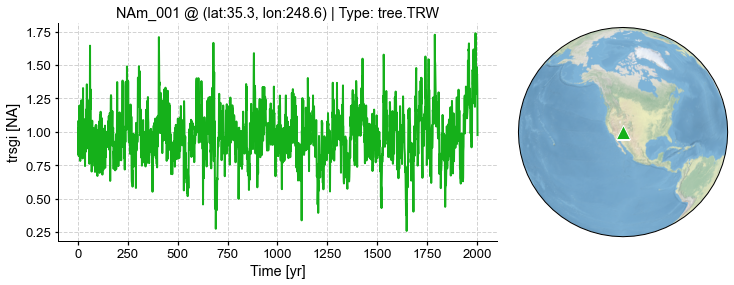

Figure saved at: "figs/pobj_example.pdf"


In [4]:
fig, ax = pdb.records['NAm_001'].plot()
cfr.showfig(fig)
cfr.savefig(fig, './figs/pobj_example.pdf')

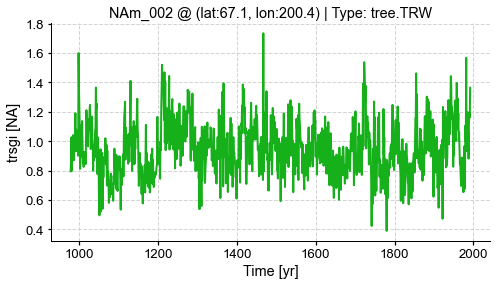

In [5]:
fig, ax = pdb.records['NAm_002'].plot(plot_map=False)

## Visualize a `ProxyDatabase`

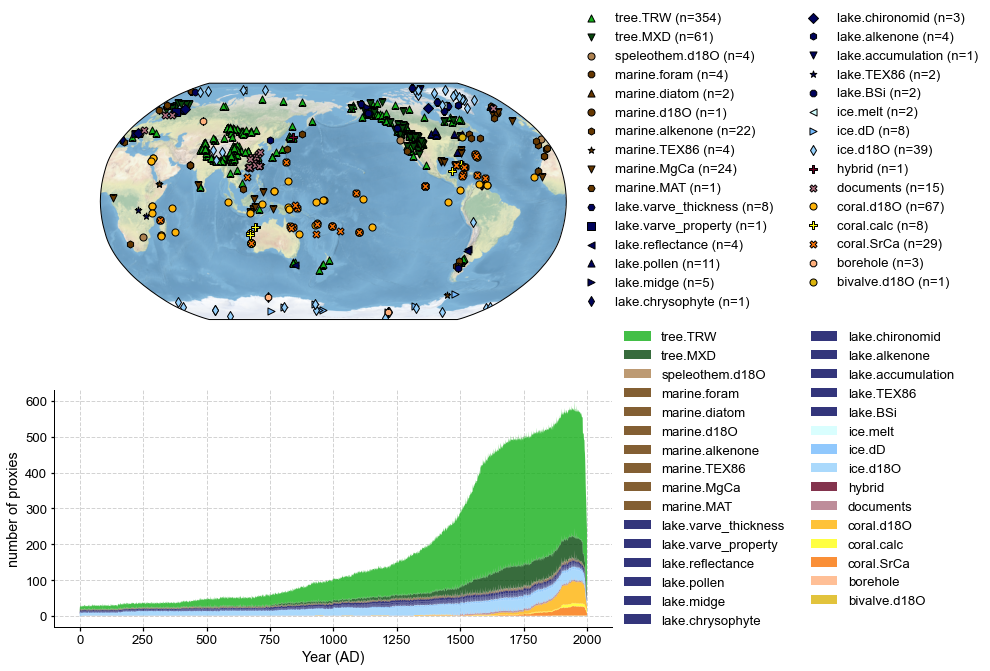

In [6]:
fig, ax = pdb.plot(plot_count=True)

## Plot a composite of a `ProxyDatabase`

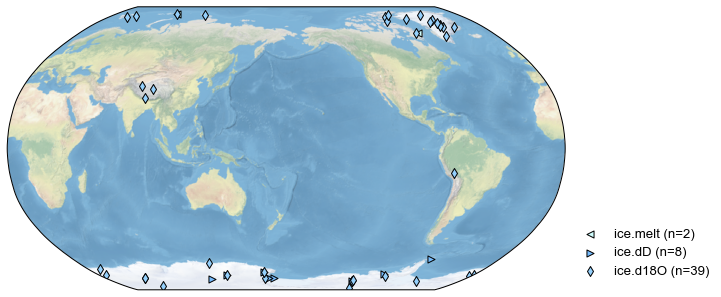

In [7]:
pdb_ice = pdb.filter(by='ptype', keys='ice')
fig, ax = pdb_ice.plot()

In [8]:
import xarray as xr
ds = xr.open_dataset('./data/HadCRUT.4.4.0.0.median.nc')
ds

<xarray.Dataset>
Dimensions:              (latitude: 36, longitude: 72, time: 1989)
Coordinates:
  * latitude             (latitude) float32 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude            (longitude) float32 -177.5 -172.5 ... 172.5 177.5
  * time                 (time) datetime64[ns] 1850-01-16T12:00:00 ... 2015-0...
Data variables:
    temperature_anomaly  (time, latitude, longitude) float32 ...
    field_status         (time) |S1 ...
Attributes:
    title:                  HadCRUT4 near-surface temperature ensemble data -...
    institution:            Met Office Hadley Centre / Climatic Research Unit...
    history:                Updated at 28/10/2015 10:05:21
    source:                 CRUTEM.4.4.0.0, HadSST.3.1.1.0
    comment:                
    reference:              Morice, C. P., J. J. Kennedy, N. A. Rayner, and P...
    version:                HadCRUT.4.4.0.0
    Conventions:            CF-1.0
    ensemble_members:       100
    ensemble_member_index:  0

In [9]:
# pdb_ice.make_composite('./data/gistemp1200_ERSSTv4.nc', vn='tempanomaly')
pdb_ice.make_composite(
    './data/HadCRUT.4.4.0.0.median.nc',
    vn='temperature_anomaly',
    lat_name='latitude', lon_name='longitude',
)

Bootstrapping: 100%|██████████| 207/207 [00:05<00:00, 39.84it/s]


In [10]:
# pdb_ice.composite['proxy_comp'].index
# pdb_ice.composite['proxy_num']
# pdb_ice.composite['df_obs']
pdb_ice.composite['slope']
# pdb_ice.composite['intercept']

1.2364533279352863

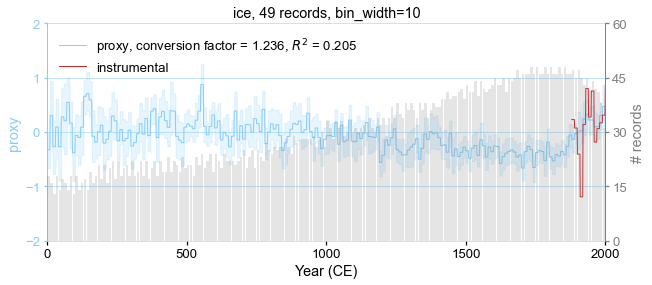

Figure saved at: "figs/composite.pdf"


In [11]:
fig, ax = pdb_ice.plot_composite()
cfr.showfig(fig)
cfr.savefig(fig, './figs/composite.pdf')

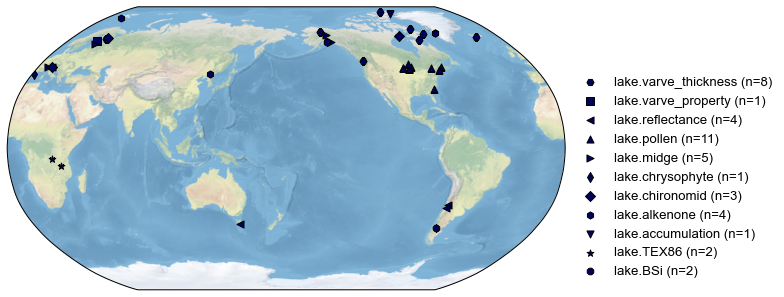

In [12]:
pdb_lake = pdb.filter(by='ptype', keys='lake')
fig, ax = pdb_lake.plot()

In [13]:
pdb_lake.make_composite(
    './data/HadCRUT.4.4.0.0.median.nc',
    vn='temperature_anomaly',
    lat_name='latitude', lon_name='longitude',
)

Bootstrapping: 100%|██████████| 566/566 [00:14<00:00, 38.67it/s]


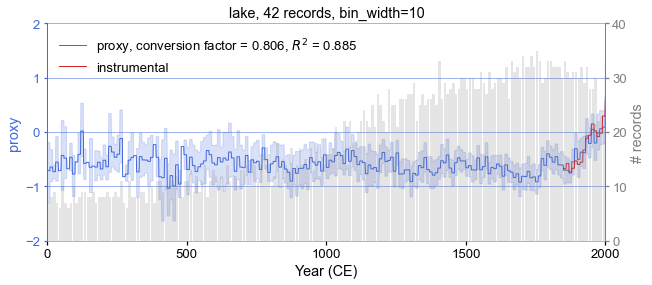

Figure saved at: "figs/composite.pdf"


In [20]:
fig, ax = pdb_lake.plot_composite(base_n=40)
cfr.showfig(fig)
cfr.savefig(fig, './figs/composite.pdf')

In [19]:
for i in pdb_lake.composite['proxy_num_value']:
    print(i)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
